In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import os
import numpy as np
from sklearn.model_selection import cross_val_score


In [2]:
# Load data from multiple CSV files
csv_dir = "./data/csv_train/"
file_path = os.listdir(csv_dir)

data_frames = [pd.read_csv(f'./data/csv_train/{file}')
               for file in file_path]
combined_data = pd.concat(data_frames, ignore_index=False)

combined_data.describe()

,latitude,longitude,altitude,altitude_diff,relative_elevation,distance,cum_distance,speed,lift?,lift_path
count,246395.000000,246395.000000,246395.000000,246395.000000,246395.000000,246395.000000,246395.000000,246395.000000,246395.000000,246395.000000
mean,46.183239,10.960967,1266.506680,-0.012680,262.499626,20.348112,26.923287,3.852743,0.000244,0.000467
std,0.078900,0.085127,424.490643,8.237209,426.892697,62.215384,19.580102,3.565807,0.015603,0.021599
min,45.884029,10.510484,30.000000,-947.250000,-1159.211000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.142949,10.942188,1004.839000,-0.827000,-1.674500,4.640000,11.217755,1.762172,0.000000,0.000000
50%,46.156417,10.989996,1247.733000,-0.011000,198.208000,7.030000,23.207870,3.065000,0.000000,0.000000
75%,46.183007,11.015397,1544.059500,0.607000,532.154500,12.520000,39.206765,5.215893,0.000000,0.000000
max,46.551682,11.115855,2625.868000,833.319000,1867.893000,12552.920000,107.941840,739.370000,1.000000,1.000000


In [3]:
# Select relevant features (columns)
# features = ["distance", "altitude_diff"]
features = ["distance", "altitude_diff", "speed"]
# Define the target column
target = "lift?"


X = combined_data[features]
y = combined_data[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


# Display the shape of the training and testing sets
print("the entire dataset\"s shape:", combined_data.shape)
print("x_train shape:", X_train.shape)
print("x_test shape:", y_test.shape)

the entire dataset"s shape: (246395, 11)
x_train shape: (197116, 3)
x_test shape: (49279,)


In [4]:
y = combined_data[target]
y[y == 1]

2       1
41      1
42      1
43      1
303     1
1       1
10      1
202     1
213     1
1042    1
1240    1
393     1
2420    1
2728    1
4262    1
156     1
160     1
1       1
10      1
202     1
213     1
1040    1
1238    1
1989    1
75      1
89      1
219     1
226     1
44      1
45      1
303     1
304     1
26      1
28      1
30      1
7       1
8       1
63      1
174     1
229     1
3       1
3822    1
1       1
9       1
257     1
268     1
944     1
3       1
12      1
98      1
104     1
109     1
113     1
116     1
118     1
3171    1
4671    1
5165    1
6624    1
7734    1
Name: lift?, dtype: int64

In [5]:
report = pd.read_csv(f"./data/report.csv")
report.describe()

,Unnamed: 0,n,sum_of_n
count,21.000000,21.000000,21.000000
mean,10.000000,2.857143,2.738095
std,6.204837,1.768777,1.757975
min,0.000000,1.000000,1.000000
25%,5.000000,1.000000,1.000000
50%,10.000000,3.000000,2.500000
75%,15.000000,4.000000,4.000000
max,20.000000,6.000000,6.000000


## RF


In [6]:
# Initialize and train the Random Forest model
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model_rf.predict(X_test)

# Evaluate the model"s performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


#### Cross validation with RF


In [9]:
# Create a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform cross-validation with 5 folds
cross_val_scores = cross_val_score(rf_model, X, y, cv=5, scoring="accuracy")

# Print the cross-validation scores
print("Cross-validation Scores:", cross_val_scores)
print("Mean Accuracy:", cross_val_scores.mean())


Cross-validation Scores: [1. 1. 1. 1. 1.]
Mean Accuracy: 1.0


## NN


In [8]:
from sklearn.neural_network import MLPClassifier

# Create neural network model
model = MLPClassifier(hidden_layer_sizes=(
    6,), activation="relu", solver="adam", random_state=42)

# Perform 5-fold cross validation
scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation scores: ", scores)

# Train model on training set
model.fit(X_train, y_train)

# Evaluate model performance on test set
print("Test set score: ", model.score(X_test, y_test))


Cross-validation scores:  [0.99989854 0.99993912 0.99995941 0.99995941 0.99995941]
Test set score:  1.0


### LR


In [ ]:
from sklearn.linear_model import LogisticRegression


model_lr = LogisticRegression()
# y_score = model_lr.fit(X_train, y_train).predict_proba(X_test)

# Perform cross-validation with 5 folds
cross_val_scores = cross_val_score(model_lr, X, y, cv=5, scoring="accuracy")

# Print the cross-validation scores
print("Cross-validation Scores:", cross_val_scores)
print("Mean Accuracy:", cross_val_scores.mean())


Cross-validation Scores: [1.         1.         0.99997971 1.         1.        ]
Mean Accuracy: 0.9999959414760852


In [13]:
import statsmodels.api as sm

# Fit the logistic regression model using statsmodels
model = sm.Logit(y, X)
result = model.fit()

# Print summary including p-values
print(result.summary())
print(result.pvalues)


/Users/nimakarimi/anaconda3/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Optimization terminated successfully.
         Current function value: 0.052064
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:                  lift?   No. Observations:               246395
Model:                          Logit   Df Residuals:                   246392
Method:                           MLE   Df Model:                            2
Date:                Tue, 29 Aug 2023   Pseudo R-squ.:                  -21.94
Time:                        21:55:22   Log-Likelihood:                -12828.
converged:                       True   LL-Null:                       -559.21
Covariance Type:            nonrobust   LLR p-value:                     1.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
distance         -0.0820      0.002    -34.983      0.000      -0.087      -0.077
altitude_diff     0

/Users/nimakarimi/anaconda3/lib/python3.11/site-packages/statsmodels/discrete/discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


array([[49271,     0],
       [    0,     8]])

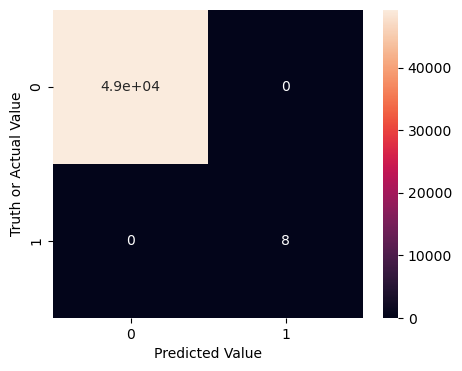

In [10]:
import seaborn as sn
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sn.heatmap(confusion_matrix, annot=True)
plt.xlabel("Predicted Value")
plt.ylabel("Truth or Actual Value")
confusion_matrix
